In [3]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

In [7]:
folders = glob.glob("../data/00_gaze_data/sub*")
folders.sort()
subjs = []
for f in folders:
    subjs.append(f[-6:])
print(len(subjs))   

subjs = subjs[:7]
print(subjs)

condition_index = ['count trash']*20 + ['free viewing']*20
condition_index[:3]

10
['sub001', 'sub002', 'sub003', 'sub004', 'sub005', 'sub006', 'sub007']


['count trash', 'count trash', 'count trash']

In [8]:
list_of_dataframes = []

for i in range(len(subjs)): #use the first 20 subjs 1-20 -- condition1
    read_file_name = '../data/03_fixation_billboards_recall_recognition/'  + subjs[i] +'_fixations_billboards_recall_recognition.csv'
    df = pd.read_csv(read_file_name, index_col = 0)
    df['subject'] = subjs[i]
    df["condition"] = condition_index[i]
    list_of_dataframes.append(df)
    
large_df = pd.concat(list_of_dataframes)
large_df.tail()

,position_index,billboard_image_at_position_text,fix_bill,recall,subject,condition
14,15,hotel,15.0,0.0,sub007,count trash
15,16,brunch,16.0,1.0,sub007,count trash
16,17,smoking,17.0,1.0,sub007,count trash
17,18,text_driving,18.0,0.0,sub007,count trash
18,20,vaping,20.0,1.0,sub007,count trash


In [9]:
large_df['fix_binarized'] = large_df['fix_bill']
#large_df.iloc[large_df['fix_binarized']>2] = 2

large_df.loc[large_df['fix_binarized'] > 1, 'fix_binarized'] = 1
#large_df.loc[large_df['fix_binarized'] > 3, 'fix_binarized'] = 3

large_df.head()

#commenting out saving
#large_df.to_csv('../data/04_statistics/csv/billboard_fixations_recall_recognition_df.csv')

,position_index,billboard_image_at_position_text,fix_bill,recall,subject,condition,fix_binarized
0,1,text_driving,0.0,0.0,sub001,count trash,0.0
1,2,burger,2.0,0.0,sub001,count trash,1.0
2,3,buckle_up,0.0,0.0,sub001,count trash,0.0
3,4,hotel,0.0,0.0,sub001,count trash,0.0
4,5,sun_protection,0.0,0.0,sub001,count trash,0.0


(0.0, 4.0)

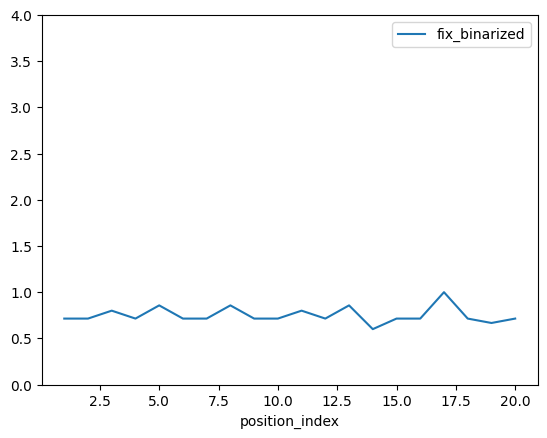

In [25]:
large_df.head()
by_pos_df = large_df[large_df['condition']=='count trash'].groupby('position_index').agg({'fix_binarized':'mean'})
by_pos_df.plot()
plt.ylim([0,4])

#by_pos_df = large_df[large_df['condition']=='free viewing'].groupby('position_index').mean()
#by_pos_df.plot()
#plt.ylim([0,4])

In [31]:
large_df.groupby('subject').agg({'fix_binarized':'sum', 'recall':'sum'})

,fix_binarized,recall
subject,,
sub001,3.0,0.0
sub002,19.0,4.0
sub003,6.0,2.0
sub004,17.0,6.0
sub005,19.0,4.0
sub006,18.0,3.0
sub007,18.0,4.0


In [33]:
by_subject_df = large_df.groupby('subject').agg({'fix_binarized':'sum', 'recall':'sum'})
#by_subject_df = by_subject_df.drop(columns = "fix_binarized")
by_subject_df['recall_rate'] = by_subject_df['recall']/20 
#by_subject_df['recognition_rate'] = by_subject_df['recognition']/20 
by_subject_df.head()

,fix_binarized,recall,recall_rate
subject,,,
sub001,3.0,0.0,0.0
sub002,19.0,4.0,0.2
sub003,6.0,2.0,0.1
sub004,17.0,6.0,0.3
sub005,19.0,4.0,0.2


### Plot

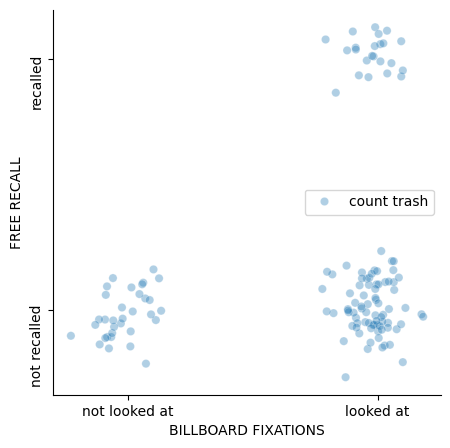

In [34]:
# list with ordered categories
fig, ax = plt.subplots(1, figsize=(5,5))

sns.scatterplot(x = jitter(large_df.fix_binarized,0), 
                y = jitter(large_df.recall,0),
                hue = large_df.condition,
                alpha=0.35,
                );
plt.legend(loc='right');

plt.xticks([0, 1], ['not looked at', 'looked at'])
plt.xlabel('BILLBOARD FIXATIONS');

plt.yticks([0, 1], ['not recalled', 'recalled'])
plt.yticks(rotation=90)
plt.ylabel('FREE RECALL');

sns.despine()

### Gradient analysis

In [38]:
subjres = []

for i in range(len(subjs)):
    res = np.zeros(3)
    
    df = large_df[large_df['subject'] == subjs[i]]
    curr_sub_med_fix = df[ df['fix_bill']!=0]['fix_bill'].median()

    res[0] = df[ df['fix_bill']==0]['recall'].sum()

    interim_df = df[ df['fix_bill'] > 0 ]
    interim_df = interim_df[ interim_df['fix_bill'] < curr_sub_med_fix ]
    res[1] = interim_df['recall'].sum()    

    res[2] = df[ df['fix_bill']>curr_sub_med_fix]['recall'].sum()  # more than 2 fixations
    
    subjres.append(res)
    
subj_df = pd.DataFrame(np.asarray(subjres), columns = ['not_fixated_recalled', 'some_fixated_recalled','alot_fixated_recalled'])
subj_df['subject'] = subjs
#subj_df['condition'] = condition_index

#commenting out saving
subj_df.to_csv('../data/04_statistics/csv/billboad_fixation_gradient_recall_R1.csv')